### In low light imaging, images tend to be noisy and loose sharp edges. However, with flash, there is an unpleasing direct-lighting effect. Thus a cross bilateral filter can be used with the range and spatial filters acting on two different images. Use a cross bilateral filter on the images pots flash.jpg and pots no flash.jpg to produce the output and report the parameters?

In [53]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [54]:
i1 = './A2_resources/pots_flash.jpg'
i2 = './A2_resources/pots_no_flash.jpg'

img1 = cv2.imread(i1)
img2 = cv2.imread(i2)

In [55]:
def gauss2D(shape,sigma):
    m,n = [(ss-1)/2 for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    
    return h

In [56]:
def bfunc(i,j,fw,fh,image1, image2, sigma_b, sigma_g, domainFilter):
    imgwork = image2[i - fh//2:i+1 + fh//2, j - fw//2:j+1 + fw//2, :]
    
    rangeFilter = ((imgwork - image1[i, j,:])**2 )/(2*(sigma_b**2))
    
    bilateralFilter = np.exp(-1*rangeFilter)*domainFilter
    bilateralFilter = bilateralFilter/np.sum(bilateralFilter,axis=(0,1))
    
    return np.sum(np.multiply(imgwork, bilateralFilter),axis=(0,1))

In [57]:
def bilateralFilterConv(image1, image2, fw,fh, sigma_b, sigma_g):
    size = image1.shape
    
    domain = gauss2D((fw,fh), sigma_g)
    
    id = 0
    if image1.shape[2] == 1:
        id = 1
        domainFilter = np.resize(domain,(*domain.shape,1))
    else:
        domainFilter = np.stack([domain, domain, domain], axis=2)
    
    out = np.zeros((size[0]-2*fw +1,size[1]-2*fh +1,size[2]))
    for i in range(size[0]-2*fh +1):
        for j in range(size[1]-2*fw +1):
            out[i,j,:] = bfunc(i+fw-1, j+fh-1, fw, fh, image1, image2, sigma_b, sigma_g, domainFilter)
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

In [58]:
img3 = bilateralFilterConv(img1, img2, 5, 5, 40, 40)

b1, g1, r1 = cv2.split(img1)
img1 = cv2.merge((r1,g1,b1))

b2, g2, r2 = cv2.split(img2)
img2 = cv2.merge((r2,g2,b2))

b3, g3, r3 = cv2.split(img3)
img3 = cv2.merge((r3,g3,b3))

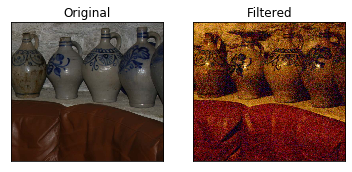

In [59]:
plt.subplot(121),plt.imshow(img1)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2)
plt.title('Filtered'), plt.xticks([]), plt.yticks([])
plt.show()

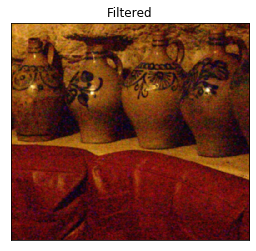

In [60]:
plt.imshow(img3)
plt.title('Filtered'), plt.xticks([]), plt.yticks([])
plt.show()